In [65]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.color import rgb2lab, lab2rgb
from matplotlib import patches as patch
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
import math
import tqdm
from numpy.linalg import inv, det
import scipy as sp
import seaborn as sns
from PIL import Image
from numpy.fft import rfft2, fft2, irfft2, ifft2,fftshift,ifftshift


%matplotlib inline



In [86]:

def defocus_kernel(d, sz=size):
    kern = np.zeros((sz, sz), np.uint8)
    cv2.circle(kern, (sz, sz), d, 255, -1, cv2.LINE_AA, shift=1)
    kern = np.float32(kern) / 255.0
    return kern


In [95]:
size = 256

img = Image.open("Picture1.png")
img = img.resize((size,size))
gray_image = img.convert('L')

kernel = defocus_kernel(32, sz=size)


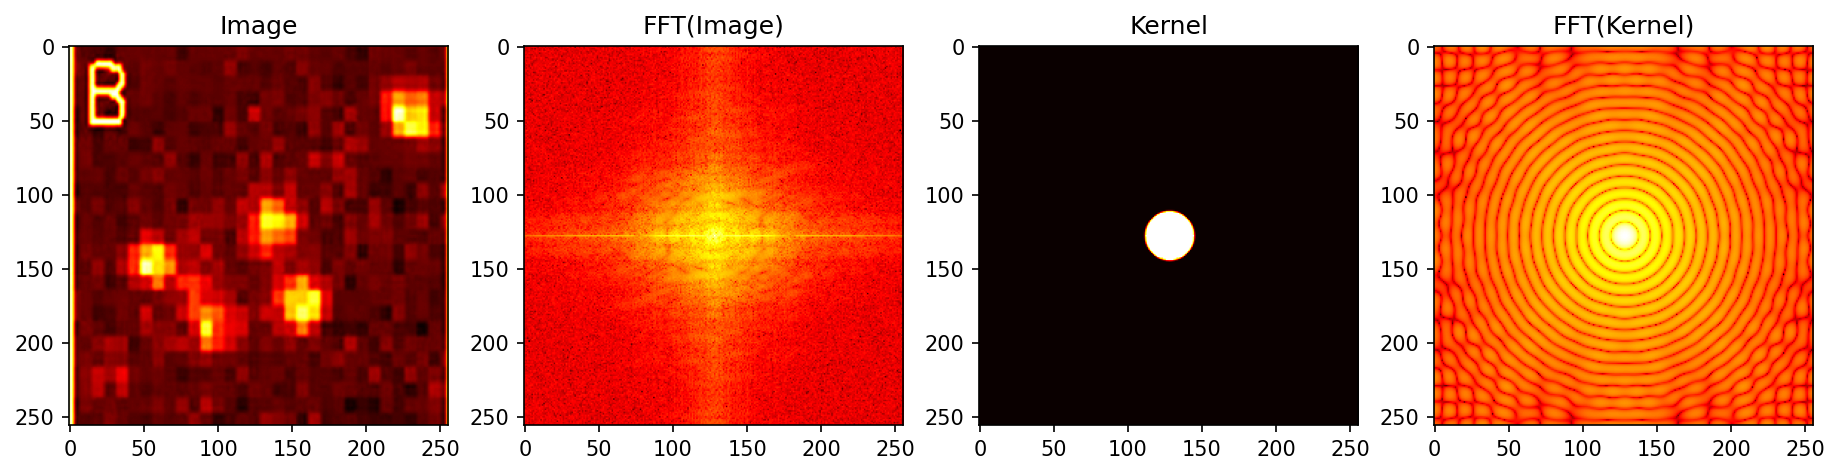

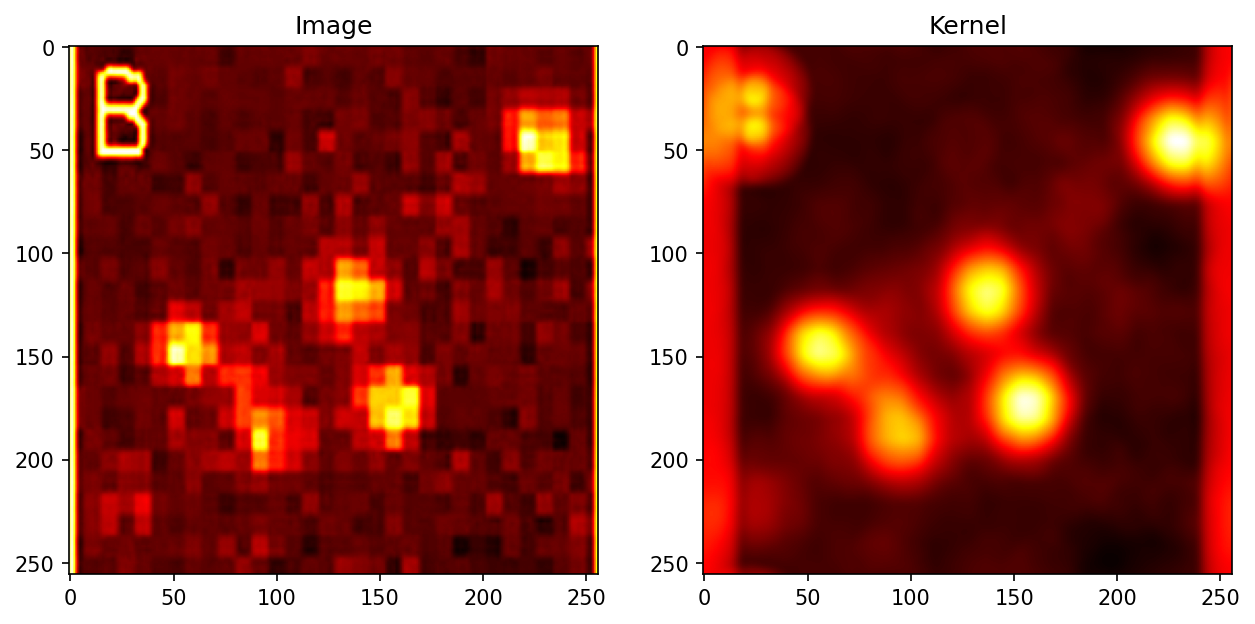

In [96]:
cmap = 'hot'

plt.figure(dpi = 150, figsize = (15,5))
plt.subplot(141)
plt.title("Image")
plt.imshow(gray_image, cmap = cmap)
plt.subplot(143)
plt.title("Kernel")
plt.imshow(kernel, cmap = cmap)
plt.subplot(142)
plt.title("FFT(Image)")

fft_img = fftshift((fft2(gray_image)))
fft_kernel = fftshift((fft2(kernel)))

plt.imshow(np.log(abs(fft_img)), cmap = cmap)
plt.subplot(144)
plt.title("FFT(Kernel)")
plt.imshow(np.log(abs(fft_kernel)), cmap = cmap)

plt.figure(dpi = 150, figsize = (10,5))
correlation = fft_img*np.conj(fft_kernel)
superresolved = abs(fftshift((ifft2(correlation))))

plt.subplot(121)
plt.title("Image")
plt.imshow(gray_image, cmap = cmap)
plt.subplot(122)
plt.title("Kernel")
plt.imshow(superresolved, cmap = cmap)


# plt.subplot(133)
# plt.title("Deconvolved Image via FFT")
# plt.imshow(f_xy, cmap = cmap)

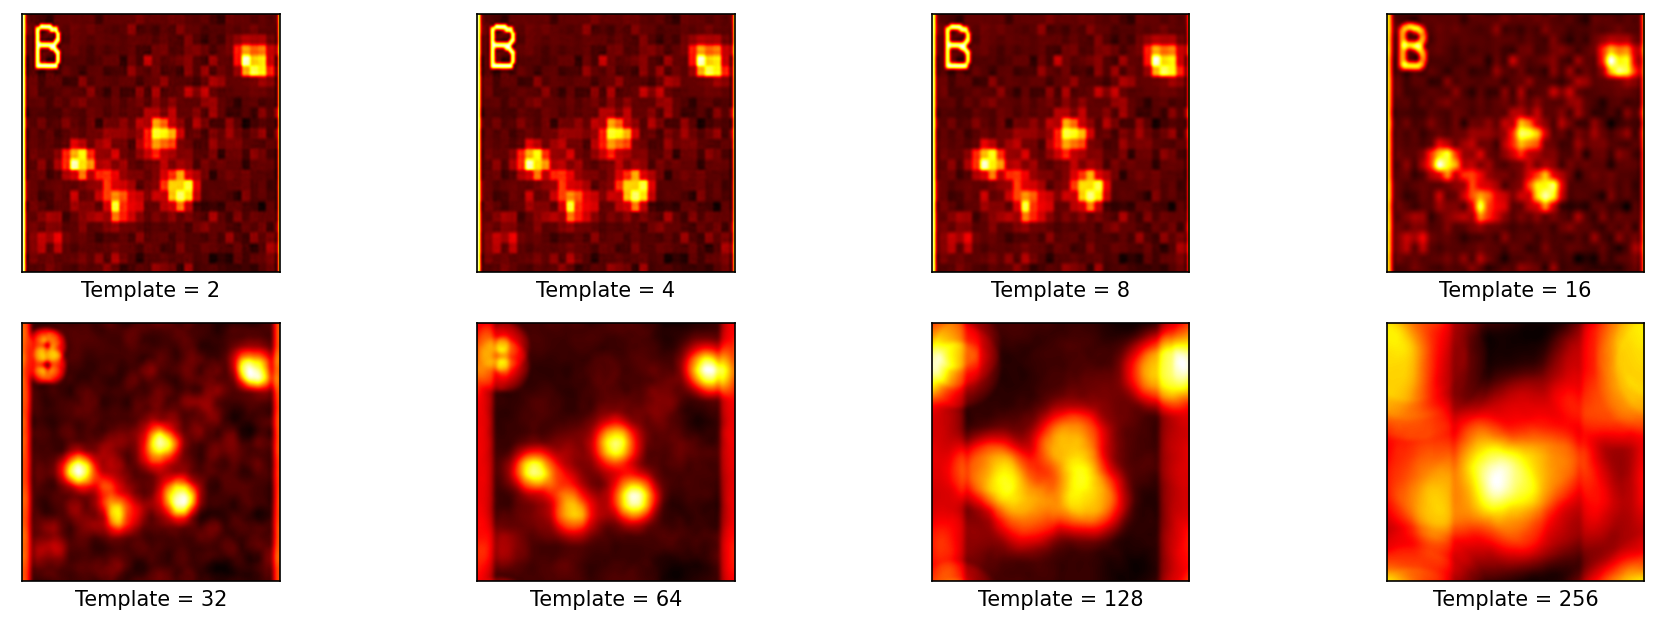

In [104]:
plt.figure(dpi = 150, figsize = (15,5))

for i in range(8):
    
    kernel = defocus_kernel(2**(i), sz=size)

    fft_img = fftshift((fft2(gray_image)))
    fft_kernel = fftshift((fft2(kernel)))

    correlation = fft_img*np.conj(fft_kernel)
    superresolved = abs(fftshift((ifft2(correlation))))
        
    plt.subplot(2,4,i+1)
    plt.imshow(superresolved, cmap = cmap)
    plt.xlabel("Template = " + str(2**(i+1)))
    plt.xticks([])
    plt.yticks([])

In [ ]:
Gaussian = np.zeros([N,N], float)
f = lambda x,y: np.exp(-(x*x+y*y)/(2*sigma*sigma))
for i in range(L//2):
	for j in range(L//2):
		Gaussian[i,j]=f(i,j)
		Gaussian[-i,-j]=f(i,j)
		Gaussian[-i,j]=f(i,j)
		Gaussian[i,-j]=f(i,j)
        

In [ ]:
plt.figure(dpi = 150, figsize = (15,5))

for i in range(8):
    
    kernel = defocus_kernel(2**(i), sz=size)

    fft_img = fftshift((fft2(gray_image)))
    fft_kernel = fftshift((fft2(kernel)))

    correlation = fft_img*np.conj(fft_kernel)
    superresolved = abs(fftshift((ifft2(correlation))))
        
    plt.subplot(2,4,i+1)
    plt.imshow(superresolved, cmap = cmap)
    plt.xlabel("Template = " + str(2**(i+1)))
    plt.xticks([])
    plt.yticks([])

In [18]:
# class GMM(object):
#     def __init__(self, X, k=2):
#         # dimension
#         X = np.asarray(X)
#         self.m, self.n = X.shape
#         self.data = X.copy()
#         # number of mixtures
#         self.k = k
        
#     def _init(self):
#         # init mixture means/sigmas
#         self.mean_arr = np.asmatrix(np.random.random((self.k, self.n)))
#         self.sigma_arr = np.array([np.asmatrix(np.identity(self.n)) for i in range(self.k)])
#         self.phi = np.ones(self.k)/self.k
#         self.w = np.asmatrix(np.empty((self.m, self.k), dtype=float))
#         #print(self.mean_arr)
#         #print(self.sigma_arr)
    
#     def fit(self, tol=1e-4):
#         self._init()
#         num_iters = 0
#         ll = 1
#         previous_ll = 0
#         while(ll-previous_ll > tol):
#             previous_ll = self.loglikelihood()
#             self._fit()
#             num_iters += 1
#             ll = self.loglikelihood()
#             print('Iteration %d: log-likelihood is %.6f'%(num_iters, ll))
#         print('Terminate at %d-th iteration:log-likelihood is %.6f'%(num_iters, ll))
    
#     def loglikelihood(self):
#         ll = 0
#         for i in range(self.m):
#             tmp = 0
#             for j in range(self.k):
#                 #print(self.sigma_arr[j])
#                 tmp += sp.stats.multivariate_normal.pdf(self.data[i, :], 
#                                                         self.mean_arr[j, :].A1, 
#                                                         self.sigma_arr[j, :]) *\
#                        self.phi[j]
#             ll += np.log(tmp) 
#         return ll
    
#     def _fit(self):
#         self.e_step()
#         self.m_step()
        
#     def e_step(self):
#         # calculate w_j^{(i)}
#         for i in range(self.m):
#             den = 0
#             for j in range(self.k):
#                 num = sp.stats.multivariate_normal.pdf(self.data[i, :], 
#                                                        self.mean_arr[j].A1, 
#                                                        self.sigma_arr[j]) *\
#                       self.phi[j]
#                 den += num
#                 self.w[i, j] = num
#             self.w[i, :] /= den
#             assert self.w[i, :].sum() - 1 < 1e-4
            
#     def m_step(self):
#         for j in range(self.k):
#             const = self.w[:, j].sum()
#             self.phi[j] = 1/self.m * const
#             _mu_j = np.zeros(self.n)
#             _sigma_j = np.zeros((self.n, self.n))
#             for i in range(self.m):
#                 _mu_j += (self.data[i, :] * self.w[i, j])
#                 _sigma_j += self.w[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
#                 #print((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
#             self.mean_arr[j] = _mu_j / const
#             self.sigma_arr[j] = _sigma_j / const

In [4]:
# def multivariate_gaussian(pos, mu, Sigma):
#     """Return the multivariate Gaussian distribution on array pos."""

#     n = mu.shape[0]
#     Sigma_det = np.linalg.det(Sigma)
#     Sigma_inv = np.linalg.inv(Sigma)
#     N = np.sqrt((2*np.pi)**n * Sigma_det)
#     # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
#     # way across all the input variables.
#     fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

#     return np.exp(-fac / 2) / N

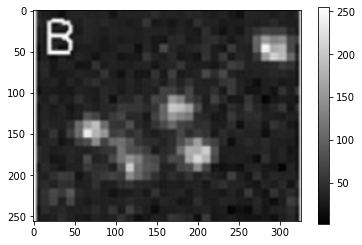

In [5]:
img = Image.open("Picture1.png")
gray_image=img.convert('L')
plt.imshow(gray_image, cmap = "gray")
plt.colorbar()

In [6]:
def blur_edge(img, d=31):
    h, w  = img.shape[:2]
    img_pad = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_WRAP)
    img_blur = cv2.GaussianBlur(img_pad, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
    y, x = np.indices((h, w))
    dist = np.dstack([x, w-x-1, y, h-y-1]).min(-1)
    w = np.minimum(np.float32(dist)/d, 1.0)
    return img*w + img_blur*(1-w)

In [20]:
kernel = defocus_kernel(25, sz=100)

In [26]:
g_xy = np.array(gray_image)

In [39]:
g_xy.shape[1]

326

In [54]:
h_xy = np.pad(kernel, [(g_xy.shape[0]//2-kernel.shape[0], kernel.shape[0]),
                       (g_xy.shape[1]//2, kernel.shape[1])], 'constant')

NameError: name 'f_xy' is not defined

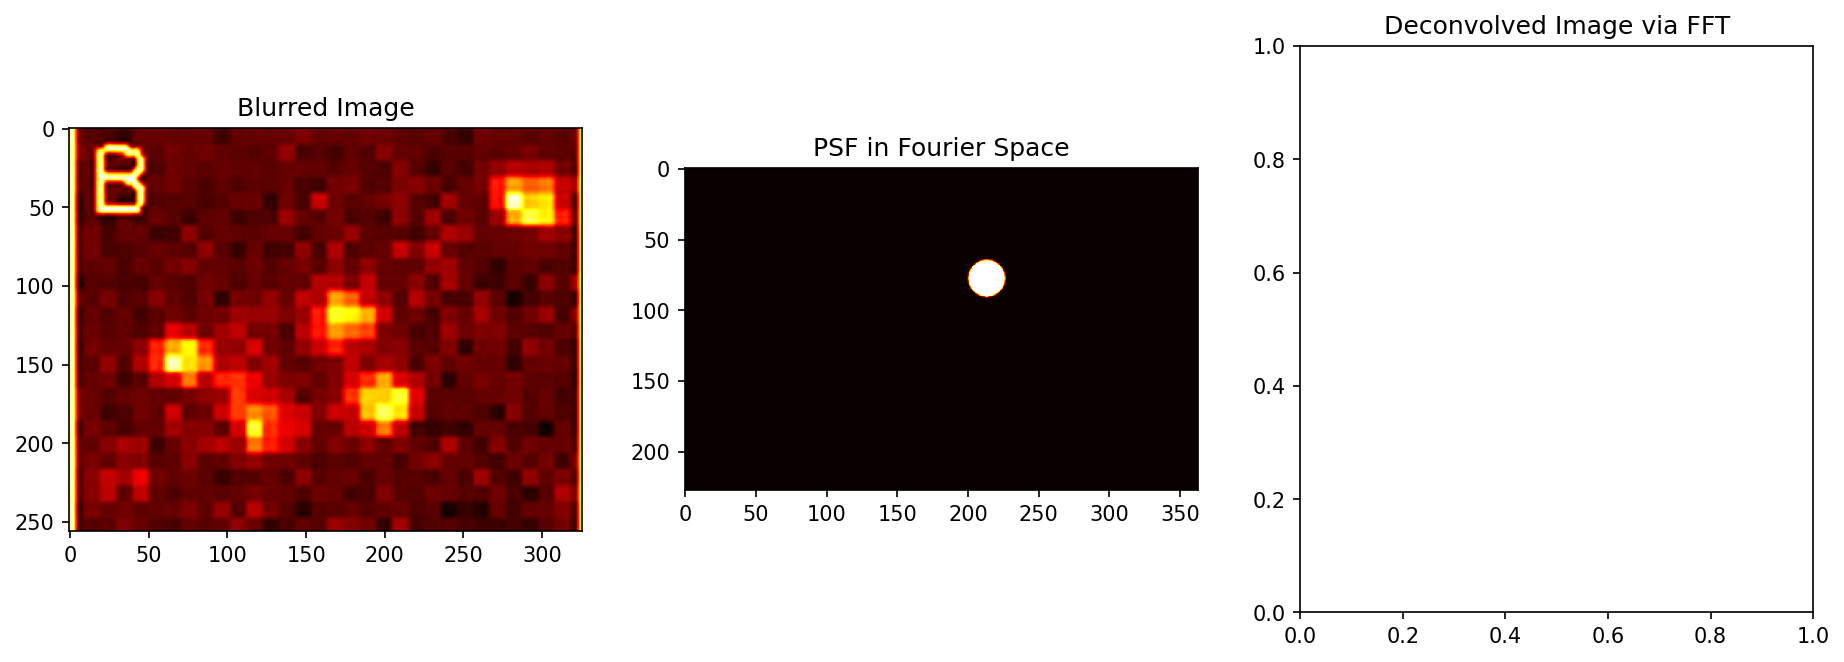

In [20]:
gmm = GMM(gray_image)
gmm.fit()

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_32336/2037328255.py:42: RuntimeWarning: divide by zero encountered in log
  ll += np.log(tmp)
/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_32336/2037328255.py:60: RuntimeWarning: invalid value encountered in true_divide
  self.w[i, :] /= den


AssertionError: 

In [14]:
for i in range(326):

(256, 326, 4)

/var/folders/rk/gz59x8xx0bz69pn391mjkglw0000gn/T/ipykernel_32336/1334679046.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(gray_image, bins = 300, normed = True)


Text(0.5, 0, 'a*')

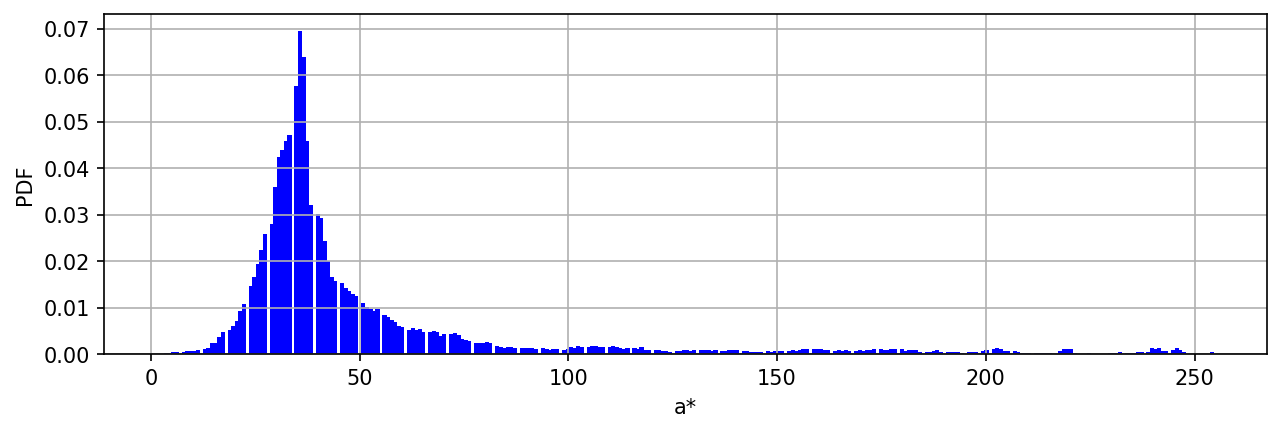

In [12]:
plt.figure(figsize = [10,3], dpi = 150)
plt.grid()
hist, bins = np.histogram(gray_image, bins = 300, normed = True)
plt.bar(bins[:-1], hist, width=1, color='b')
plt.ylabel("PDF")
plt.xlabel("a*")
plt.colorbar
# plt.xlim(-8,8)